In [12]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [13]:
X,y = mnist['data'], mnist['target']

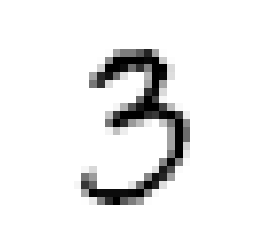

In [14]:
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(X[20000].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()


In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
import numpy as np

shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_idx], y_train[shuffle_idx]

#for a binary classifier - classify 3
y_train3 = (y_train == 3)
y_test3 = (y_test == 3)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train3)
sgd_clf.predict([X[20000]])



array([ True], dtype=bool)

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_ind, test_ind in skfolds.split(X_train, y_train3):
    clone_clf = clone(sgd_clf)
    X_cur = X_train[train_ind]
    y_cur = y_train3[train_ind]
    X_cur_tst = X_train[test_ind]
    y_cur_tst = y_train3[test_ind]
    
    clone_clf.fit(X_cur, y_cur)
    pred = clone_clf.predict(X_cur_tst)
    num_correct = sum(pred == y_cur_tst)
    print(num_correct/len(pred))
    

0.969251537423
0.9623
0.966298314916


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train3, scoring = 'accuracy', cv = 3)

array([ 0.96925154,  0.9623    ,  0.96629831])

In [19]:
from sklearn.model_selection import cross_val_predict
y_train3_pred = cross_val_predict(sgd_clf, X_train, y_train3, cv = 3)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train3, y_train3_pred)

array([[53429,   440],
       [ 1603,  4528]])

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train3, cv = 3, method = 'decision_function')
from sklearn.metrics import precision_recall_curve
pre, rec, thresh = precision_recall_curve(y_train3, y_train_pred[:,1])

def plot_precision_recall_thresh(precision, recall, thresh):
    plt.plot(thresh, precision[:-1], 'r-', label = 'precision')
    plt.plot(thresh, recall[:-1], 'b--', label = 'recall')
    plt.xlabel('threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([0,1])
    
plot_precision_recall_thresh(pre, rec, thresh)
plt.show()

IndexError: too many indices for array

In [ ]:
#multiclass
#sgd automatically does one v all

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_clf.decision_function(X_train[1:11,:])

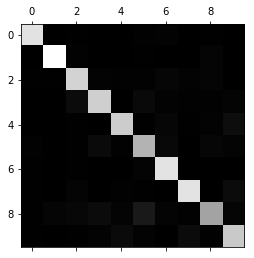

In [23]:
sgd_clf = SGDClassifier()
sgd_score = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)
conf = confusion_matrix(y_train, sgd_score)
plt.matshow(conf, cmap = plt.cm.gray)
plt.show()

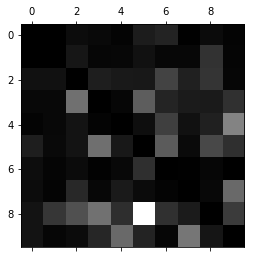

In [26]:
tot_eg = conf.sum(axis = 1, keepdims = True)
conf_norm = conf/tot_eg
np.fill_diagonal(conf_norm, 0)
plt.matshow(conf_norm, cmap = plt.cm.gray)
plt.show()